<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Sentiment_Analysis/ABSA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
DATA = pd.read_csv('Amazon Reviews_1_100.csv')

#***INFORMATION ABOUT DATASET***

In [ ]:
DATA.head()

,default_header,review_body,label
0,1,One of the best game music soundtracks - for a...,1
1,101,Sassy Baby Warming Dish. Interesting concept.:...,1
2,201,Long Hot Summer: Sweet Dream Baby by Sterling ...,1
3,301,Obligatory: My kindle is making me do this...O...,1
4,401,"Good politics, but no science: The book starts...",0


In [ ]:
DATA.columns = ['No.', 'Review_Text', 'Sentiment_Label']  # ]column titles


In [ ]:
DATA.count()

,0
No.,136665
Review_Text,136661
Sentiment_Label,136665


In [ ]:
DATA.shape

(136665, 3)

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136665 entries, 0 to 136664
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   No.              136665 non-null  int64 
 1   Review_Text      136661 non-null  object
 2   Sentiment_Label  136665 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ MB


In [ ]:
DATA.describe()

,No.,Sentiment_Label
count,1.366650e+05,136665.000000
mean,6.946224e+06,0.693323
std,4.089123e+06,0.461116
min,1.000000e+00,0.000000
25%,3.416601e+06,0.000000
50%,6.833201e+06,1.000000
75%,1.058266e+07,1.000000
max,1.408436e+07,1.000000


In [ ]:
DATA.head(10)

,No.,Review_Text,Sentiment_Label
0,1,One of the best game music soundtracks - for a...,1
1,101,Sassy Baby Warming Dish. Interesting concept.:...,1
2,201,Long Hot Summer: Sweet Dream Baby by Sterling ...,1
3,301,Obligatory: My kindle is making me do this...O...,1
4,401,"Good politics, but no science: The book starts...",0
5,501,"Waste of money: If you get to this review, ple...",0
6,601,Waste of time and money: I have used this prod...,0
7,701,Only works with Microsoft e-mail clients: If y...,0
8,801,poor reading: I bought this book on tape as re...,0
9,901,"It may be a modern-day classic to some, but no...",0


#***DATA VISUALIZATION***

####Distribution of Sentiment Labels

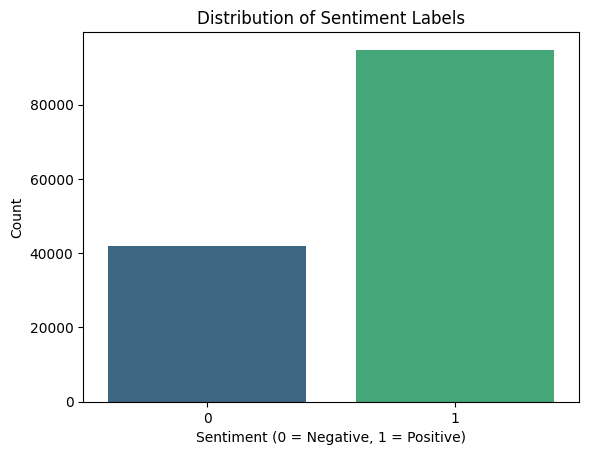

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(data=DATA, x="Sentiment_Label", palette="viridis")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


####Word Cloud of Reviews

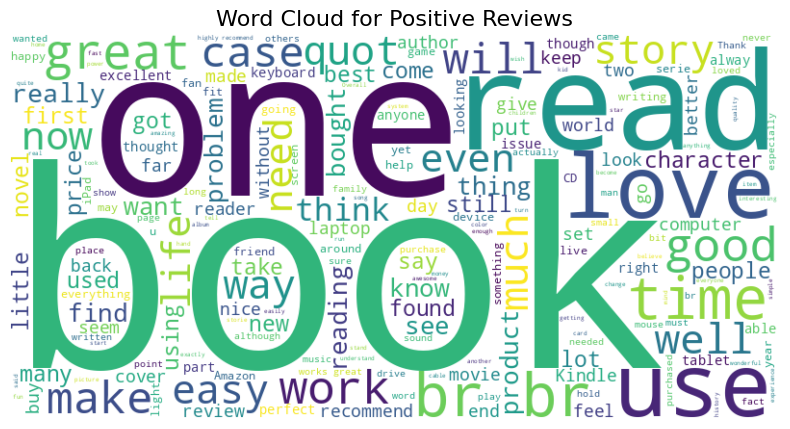

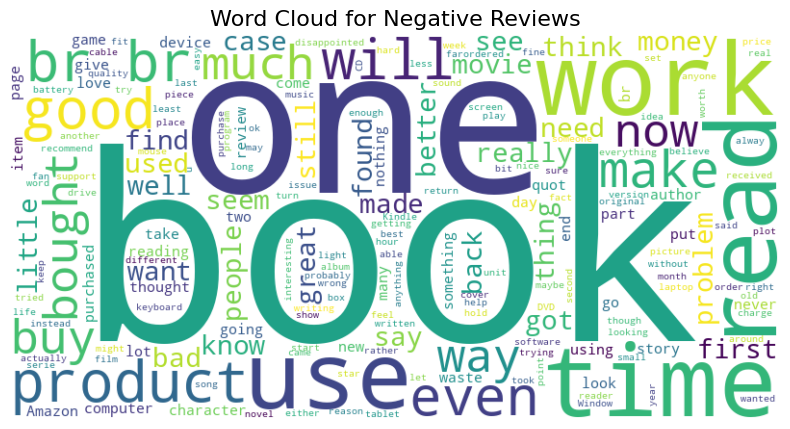

In [ ]:
from wordcloud import WordCloud

# Function to create word clouds by sentiment
def generate_word_cloud(data, label, title):
    text = " ".join(data[data["Sentiment_Label"] == label]["Review_Text"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Word cloud for positive reviews
generate_word_cloud(DATA, label=1, title="Word Cloud for Positive Reviews")

# Word cloud for negative reviews
generate_word_cloud(DATA, label=0, title="Word Cloud for Negative Reviews")


####Review Length Distribution

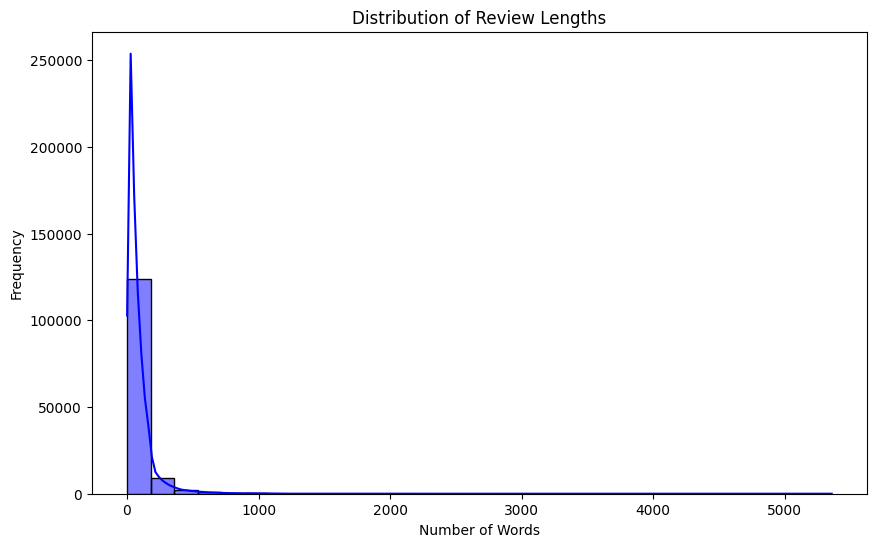

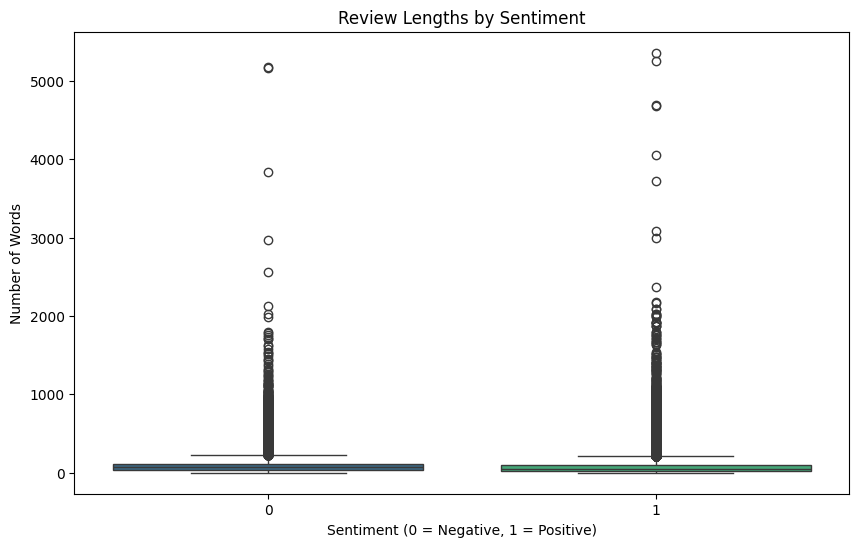

In [ ]:
# Add a column for review lengths
DATA["review_length"] = DATA["Review_Text"].dropna().apply(lambda x: len(x.split()))

# Histogram of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(DATA["review_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Box plot comparing review lengths by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=DATA, x="Sentiment_Label", y="review_length", palette="viridis")
plt.title("Review Lengths by Sentiment")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Words")
plt.show()


####Top Words by Sentiment

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


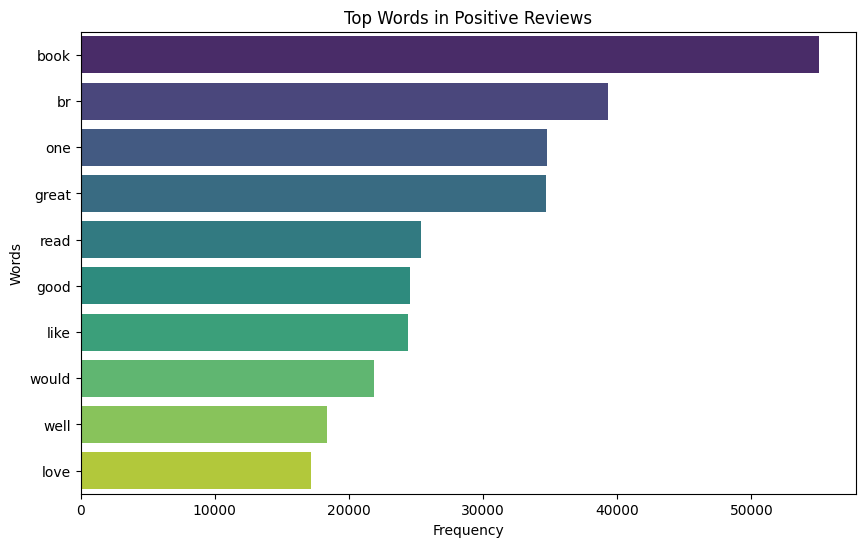

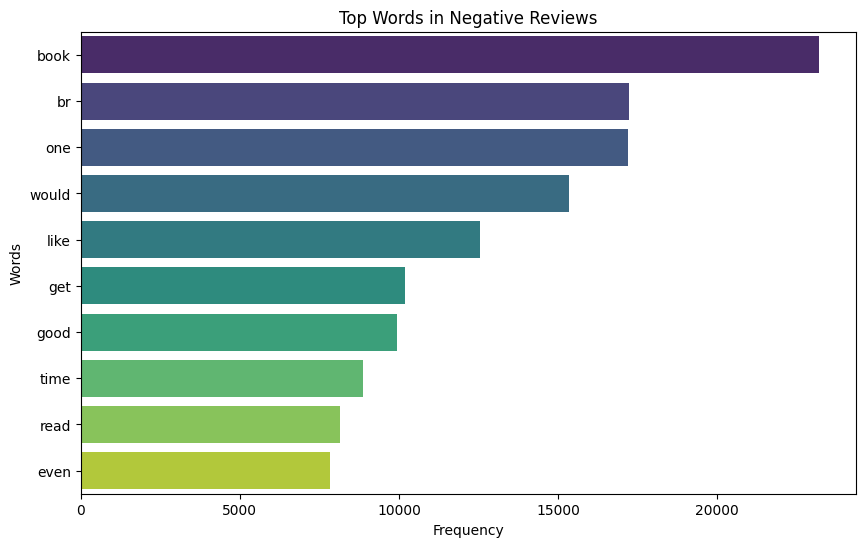

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already done
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

# Function to get top words for a sentiment
def get_top_words(data, label, n=10):
    text = " ".join(data[data["Sentiment_Label"] == label]["Review_Text"].dropna())
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]
    return Counter(words).most_common(n)

# Get top words for positive and negative reviews
top_positive = get_top_words(DATA, label=1)
top_negative = get_top_words(DATA, label=0)

# Plot top words
def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_top_words(top_positive, "Top Words in Positive Reviews")
plot_top_words(top_negative, "Top Words in Negative Reviews")


####Common N-grams

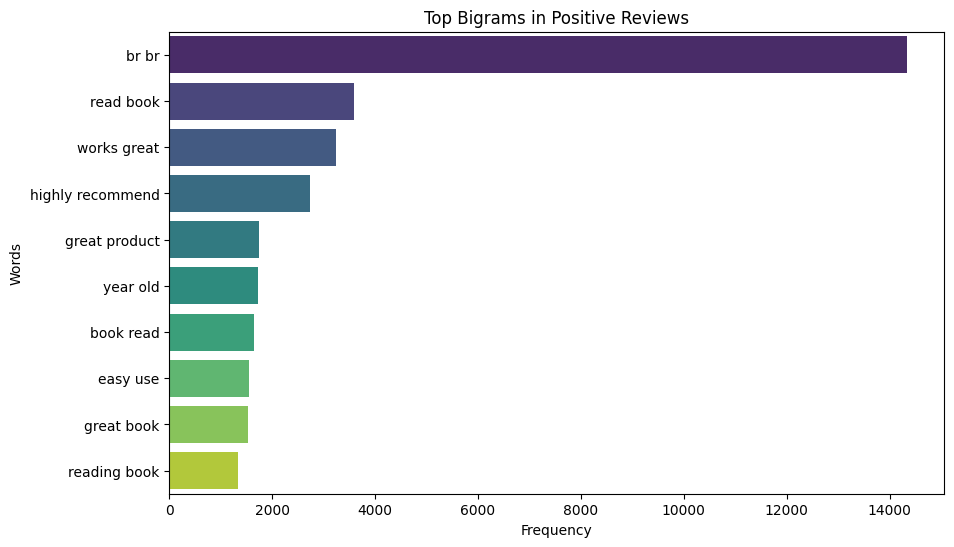

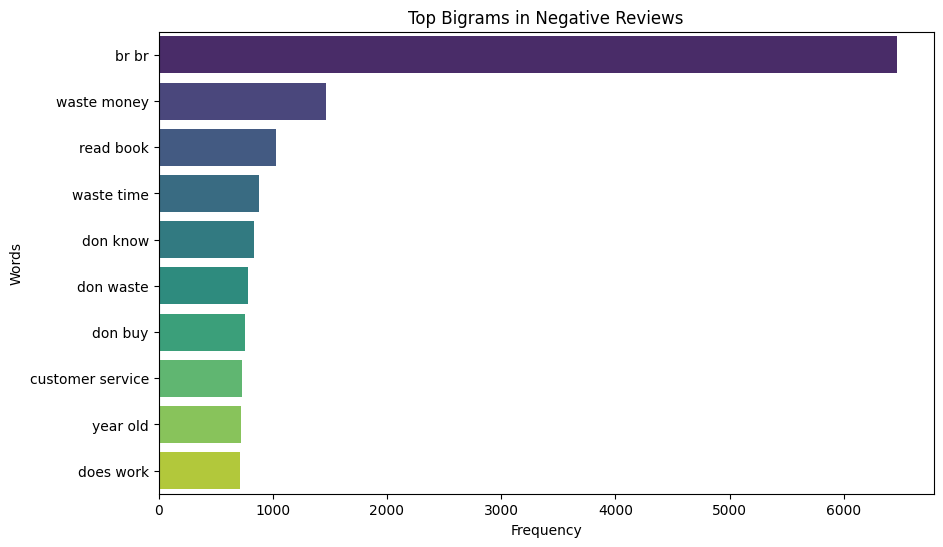

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract n-grams
def get_top_ngrams(data, label, ngram_range=(2, 2), n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english")
    text = data[data["Sentiment_Label"] == label]["Review_Text"].dropna()
    X = vectorizer.fit_transform(text)
    ngram_counts = X.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    ngram_counts = sorted(zip(ngram_counts, ngram_features), reverse=True)[:n]
    return [(feature, count) for count, feature in ngram_counts]

# Get top bigrams for positive and negative reviews
top_positive_ngrams = get_top_ngrams(DATA, label=1)
top_negative_ngrams = get_top_ngrams(DATA, label=0)

# Plot top n-grams
plot_top_words(top_positive_ngrams, "Top Bigrams in Positive Reviews")
plot_top_words(top_negative_ngrams, "Top Bigrams in Negative Reviews")

# ***DATA PRE-PROCESSING***

###Handling missing values

In [ ]:
DATA.isnull().sum()

,0
No.,0
Review_Text,4
Sentiment_Label,0
review_length,4


In [ ]:
DATA['Review_Text'] = DATA.Review_Text.fillna(' ')
DATA['review_length'] = DATA.Review_Text.fillna(' ')

In [ ]:
DATA.isnull().sum()

,0
No.,0
Review_Text,0
Sentiment_Label,0
review_length,0


###Handling duplicate values

In [ ]:
Duplicates = DATA.duplicated().sum()
print(Duplicates)

0


###Text processing

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

####Convert text to lowercase

In [ ]:
DATA['Review_Text'].head()

,Review_Text
0,One of the best game music soundtracks - for a...
1,Sassy Baby Warming Dish. Interesting concept.:...
2,Long Hot Summer: Sweet Dream Baby by Sterling ...
3,Obligatory: My kindle is making me do this...O...
4,"Good politics, but no science: The book starts..."


In [ ]:
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
DATA['Review_Text'].head()

,Review_Text
0,one of the best game music soundtracks - for a...
1,sassy baby warming dish. interesting concept.:...
2,long hot summer: sweet dream baby by sterling ...
3,obligatory: my kindle is making me do this...o...
4,"good politics, but no science: the book starts..."


#### Remove links

In [ ]:
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

#### Remove punctuations

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
DATA['Review_Text'].tail()

,Review_Text
202043,product is as mentioned: the product is as men...
202044,i miss you!!: i have loved this hair dryer for...
202045,grizzly provides great value.: bought this as ...
202046,"not for very young children, or non-religious ..."
202047,old turtle book: i purchased this book for eve...


In [ ]:
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

DATA['Review_Text'] = DATA['Review_Text'].apply(remove_punctuation)

In [ ]:
DATA['Review_Text'].head()

,Review_Text
0,one of the best game music soundtracks for a ...
1,sassy baby warming dish interesting concept we...
2,long hot summer sweet dream baby by sterling w...
3,obligatory my kindle is making me do thisone t...
4,good politics but no science the book starts w...


#### Remove special characters and numbers

In [ ]:
DATA['Review_Text'].tail(5)

,Review_Text
136660,this is a piece of c do not waste your money o...
136661,i am a global traveller and backup all my data...
136662,for the price it is one of the cheapest 2gb fl...
136663,received the cf yesterday tested it last night...
136664,kingston must know what theyre doing with the ...


In [ ]:
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [ ]:
DATA['Review_Text'].tail()

,Review_Text
136660,this is a piece of c do not waste your money o...
136661,i am a global traveller and backup all my data...
136662,for the price it is one of the cheapest gb fla...
136663,received the cf yesterday tested it last night...
136664,kingston must know what theyre doing with the ...


#### Remove Stopwords

In [ ]:
DATA['Review_Text'].tail()

,Review_Text
136660,thi is a piec of c do not wast your money on t...
136661,i am a global travel and backup all my data wh...
136662,for the price it is one of the cheapest gb fla...
136663,receiv the cf yesterday test it last night so ...
136664,kingston must know what theyr do with the prod...


In [ ]:
stop_words = stopwords.words('english')
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [ ]:
DATA['Review_Text'].tail()

,Review_Text
136660,thi piec c wast money thi junk ive noth drop c...
136661,global travel backup data everi possibl thi wa...
136662,price one cheapest gb flash drive good news en...
136663,receiv cf yesterday test last night far good p...
136664,kingston must know theyr product cheap lightwe...


#### Stemming

In [ ]:
DATA['Review_Text'].head(20)

,Review_Text
0,one of the best game music soundtracks for a ...
1,sassy baby warming dish interesting concept we...
2,long hot summer sweet dream baby by sterling w...
3,obligatory my kindle is making me do thisone t...
4,good politics but no science the book starts w...
5,waste of money if you get to this review pleas...
6,waste of time and money i have used this produ...
7,only works with microsoft email clients if you...
8,poor reading i bought this book on tape as rea...
9,it may be a modernday classic to some but not ...


In [ ]:
ps = PorterStemmer()
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))

In [ ]:
DATA['Review_Text'].head(20)

,Review_Text
0,one best game music soundtrack game didnt real...
1,sassi babi warm dish interest concept tri babi...
2,long hot summer sweet dream babi sterl watsono...
3,obligatori kindl make thison two three four fi...
4,good polit scienc book start entic psychohisto...
5,wast money get thi review pleas pleas spend ha...
6,wast time money use thi product addit fogger c...
7,onli work microsoft email client secur mind ch...
8,poor read bought thi book tape read author exc...
9,may modernday classic thi horror film base ori...


#### Tokenization

In [ ]:
DATA['tokens'] = DATA['Review_Text'].apply(nltk.word_tokenize)

In [ ]:
#stop_words = set(stopwords.words('english'))
DATA['tokens'] = DATA['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

#### Lemmatization

In [ ]:
DATA['Review_Text'].head(10)

,Review_Text
0,one best game music soundtrack game didnt real...
1,sassi babi warm dish interest concept tri babi...
2,long hot summer sweet dream babi sterl watsono...
3,obligatori kindl make thison two three four fi...
4,good polit scienc book start entic psychohisto...
5,wast money get thi review pleas pleas spend ha...
6,wast time money use thi product addit fogger c...
7,onli work microsoft email client secur mind ch...
8,poor read bought thi book tape read author exc...
9,may modernday classic thi horror film base ori...


In [ ]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
DATA['tokens'] = DATA['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
DATA['Review_Text'].head(10)

,Review_Text
0,one best game music soundtrack game didnt real...
1,sassi babi warm dish interest concept tri babi...
2,long hot summer sweet dream babi sterl watsono...
3,obligatori kindl make thison two three four fi...
4,good polit scienc book start entic psychohisto...
5,wast money get thi review pleas pleas spend ha...
6,wast time money use thi product addit fogger c...
7,onli work microsoft email client secur mind ch...
8,poor read bought thi book tape read author exc...
9,may modernday classic thi horror film base ori...


#### Finalize

In [ ]:
# Filter short reviews (length < 3 words)
DATA['review_length'] = DATA['tokens'].apply(len)
DATA = DATA[DATA['review_length'] >= 3]

# Feature engineering: Join tokens back into sentences
DATA['cleaned_review'] = DATA['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
DATA.head()

,No.,Review_Text,Sentiment_Label,review_length,tokens,cleaned_review
0,1,one best game music soundtrack game didnt real...,1,82,"[one, best, game, music, soundtrack, game, did...",one best game music soundtrack game didnt real...
1,101,sassi babi warm dish interest concept tri babi...,1,34,"[sassi, babi, warm, dish, interest, concept, t...",sassi babi warm dish interest concept tri babi...
2,201,long hot summer sweet dream babi sterl watsono...,1,47,"[long, hot, summer, sweet, dream, babi, sterl,...",long hot summer sweet dream babi sterl watsono...
3,301,obligatori kindl make thison two three four fi...,1,16,"[obligatori, kindl, make, thison, two, three, ...",obligatori kindl make thison two three four fi...
4,401,good polit scienc book start entic psychohisto...,0,67,"[good, polit, scienc, book, start, entic, psyc...",good polit scienc book start entic psychohisto...


### DataSet

In [ ]:
DATA.head()

,No.,Review_Text,Sentiment_Label,review_length,tokens,cleaned_review
0,1,one best game music soundtrack game didnt real...,1,82,"[one, best, game, music, soundtrack, game, did...",one best game music soundtrack game didnt real...
1,101,sassi babi warm dish interest concept tri babi...,1,34,"[sassi, babi, warm, dish, interest, concept, t...",sassi babi warm dish interest concept tri babi...
2,201,long hot summer sweet dream babi sterl watsono...,1,47,"[long, hot, summer, sweet, dream, babi, sterl,...",long hot summer sweet dream babi sterl watsono...
3,301,obligatori kindl make thison two three four fi...,1,16,"[obligatori, kindl, make, thison, two, three, ...",obligatori kindl make thison two three four fi...
4,401,good polit scienc book start entic psychohisto...,0,67,"[good, polit, scienc, book, start, entic, psyc...",good polit scienc book start entic psychohisto...


In [ ]:
DATA.count()

,0
No.,131876
Review_Text,131876
Sentiment_Label,131876
review_length,131876
tokens,131876
cleaned_review,131876


#### X & Y

In [ ]:
# Separate features (X) and target (Y)
target_column = 'Sentiment_Label'  # Replace 'label' with the actual name of your target column
Y = DATA[target_column]
X = DATA.drop(columns=[target_column])

# Print the shapes of X and Y
print("Features shape: ", X.shape)
print("Target shape: ", Y.shape)

# Check for missing values in the target column
if Y.isnull().sum() > 0:
    print(f"Missing values in target: {Y.isnull().sum()}")

# Check for missing values in the features
null_counts = X.isnull().sum()
if null_counts.any():  # Check if any column has missing values
    print(f"Missing values in features:\n{null_counts[null_counts > 0]}")
else:
    print("No missing values in features.")


Features shape:  (131876, 5)
Target shape:  (131876,)
No missing values in features.


#### Train & Test

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the resulting datasets
print("Training features shape: ", X_train.shape)
print("Testing features shape: ", X_test.shape)
print("Training target shape: ", Y_train.shape)
print("Testing target shape: ", Y_test.shape)

# Check if the class distribution is preserved after the split
print("\nClass distribution in training set:")
print(Y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(Y_test.value_counts(normalize=True))

Training features shape:  (105500, 5)
Testing features shape:  (26376, 5)
Training target shape:  (105500,)
Testing target shape:  (26376,)

Class distribution in training set:
Sentiment_Label
1    0.685659
0    0.314341
Name: proportion, dtype: float64

Class distribution in testing set:
Sentiment_Label
1    0.685661
0    0.314339
Name: proportion, dtype: float64


#### Handle class Imbalance

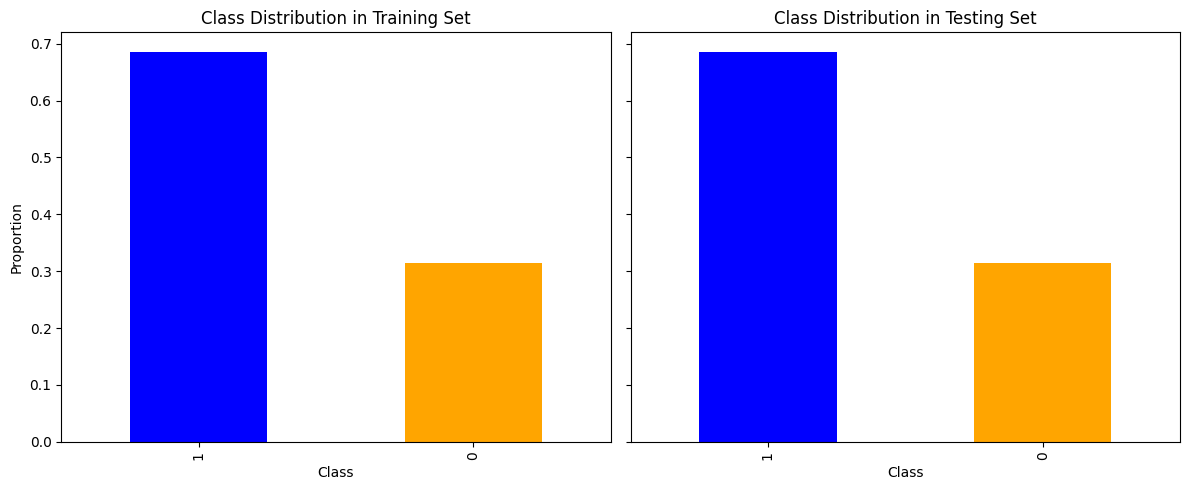

In [ ]:
import matplotlib.pyplot as plt

# Visualize class distribution in training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set
Y_train.value_counts(normalize=True).plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title("Class Distribution in Training Set")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Proportion")

# Testing set
Y_test.value_counts(normalize=True).plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title("Class Distribution in Testing Set")
axes[1].set_xlabel("Class")

plt.tight_layout()
plt.show()

# ***BERT***

In [ ]:
# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
from collections import Counter
volab = Counter()

In [ ]:
# Set the model name
MODEL_NAME = 'bert-base-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Store length of each review
token_lens = []

# Iterate through the 'Review_Text' column instead of 'content'
for txt in data['Review_Text']:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text(0.5, 0, 'Token count')

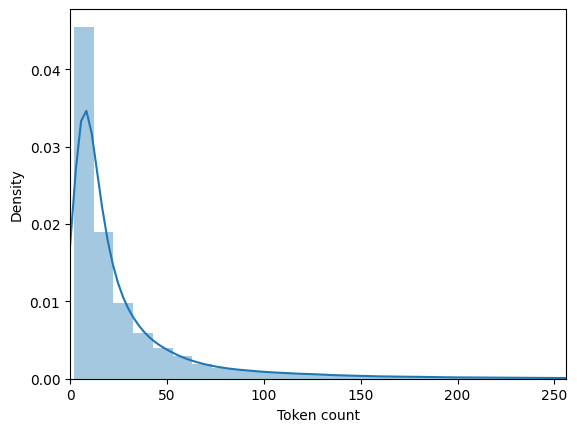

In [ ]:
# plot the distribution of review lengths
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [ ]:
class GPReviewDataset(Dataset):
    # Constructor Function
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.reviews)

    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        # Encoded format to be returned
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
import random

# Assuming RANDOM_SEED is intended to be used, it should be defined:
RANDOM_SEED = 42  # Or any desired integer
# you can change this random seed value to get different result each time the model train


data_train, data_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
data_val, data_test = train_test_split(data_test, test_size=0.5, random_state=RANDOM_SEED)

print(data_train.shape, data_val.shape, data_test.shape)

(94622, 3) (11828, 3) (11828, 3)


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tokens = word_tokenize(data['Review_Text'].str.cat(sep=' '))
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if w not in stop_words]
print(filtered_tokens)

NameError: name 'data' is not defined

## Text Normalization

#### Spelling check

In [ ]:
data = pd.read_csv('AR.csv')

In [ ]:
data['Review_Text'].tail()

NameError: name 'data' is not defined

In [ ]:
from textblob import TextBlob
import contractions

def normalize_text(text):
    text = contractions.fix(text)
    text = TextBlob(text).correct().string
    return text

data['Review_Text'] = data['Review_Text'].apply(normalize_text)

#SBERT

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sentiment_Label'] = le.fit_transform(data['Sentiment_Label'])
print(data['Sentiment_Label'])

# ***Aspect term extraction***

In [ ]:
from transformers import BertModel, BertTokenizer
from transformers import get_scheduler
import torch
from torch.utils.data import Dataset
from torch.utils.data import Dataset, DataLoader
import time
import os
from tqdm import tqdm

In [ ]:
class ABTEDataset(Dataset):
    def __init__(self, df, tokenizer):
        self.df = df
        self.tokenizer = tokenizer

    def __getitem__(self, index):
        tokens = self.df.iloc[index]['tokens']
        tags = self.df.iloc[index]['tags']
        pols = self.df.iloc[index]['pols']

        tokens = tokens.replace("'", "").strip("][").split(', ')
        tags = tags.strip('][').split(', ')
        pols = pols.strip('][').split(', ')


    def __len__(self):
        return len(self.df)